In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-data/Iris.csv


In [122]:
#importing libraries

import numpy as np 
import pandas as pd 

In [123]:
df=pd.read_csv('/kaggle/input/iris-data/Iris.csv')

In [124]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [125]:
df.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Dropping unnecessary columns

In [127]:
df=df.drop('Id',axis=1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exploring the dataset

In [128]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing

In [129]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
LE= LabelEncoder()


In [130]:
df.iloc[:,-1]= LE.fit_transform(df.iloc[:,-1])
df

/tmp/ipykernel_33/188223481.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1]= LE.fit_transform(df.iloc[:,-1])


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Spliting Data into Independent and Dependent Var

In [131]:
x=df.iloc[:,:-1]
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Train and Test split


In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train,X_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=50)

In [134]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [135]:
X_train.shape

(120, 4)

In [136]:
y_train.shape

(120,)

# Model Building


In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dt=DecisionTreeClassifier()

In [139]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Comparison Between Actual & Predicted output

In [140]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [141]:
y_test= np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

# Accuracy of DT Model

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9666666666666667

In [143]:
from sklearn.metrics import confusion_matrix


In [144]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]])

**The confusion matrix shows the ways in which your classification model is confused when it makes predictions**

# Classification Report of DT Model

In [145]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives.**

**precision = TP/TP+FP**

# DT Model Visualization

In [147]:
from sklearn import tree
import matplotlib.pyplot as plt

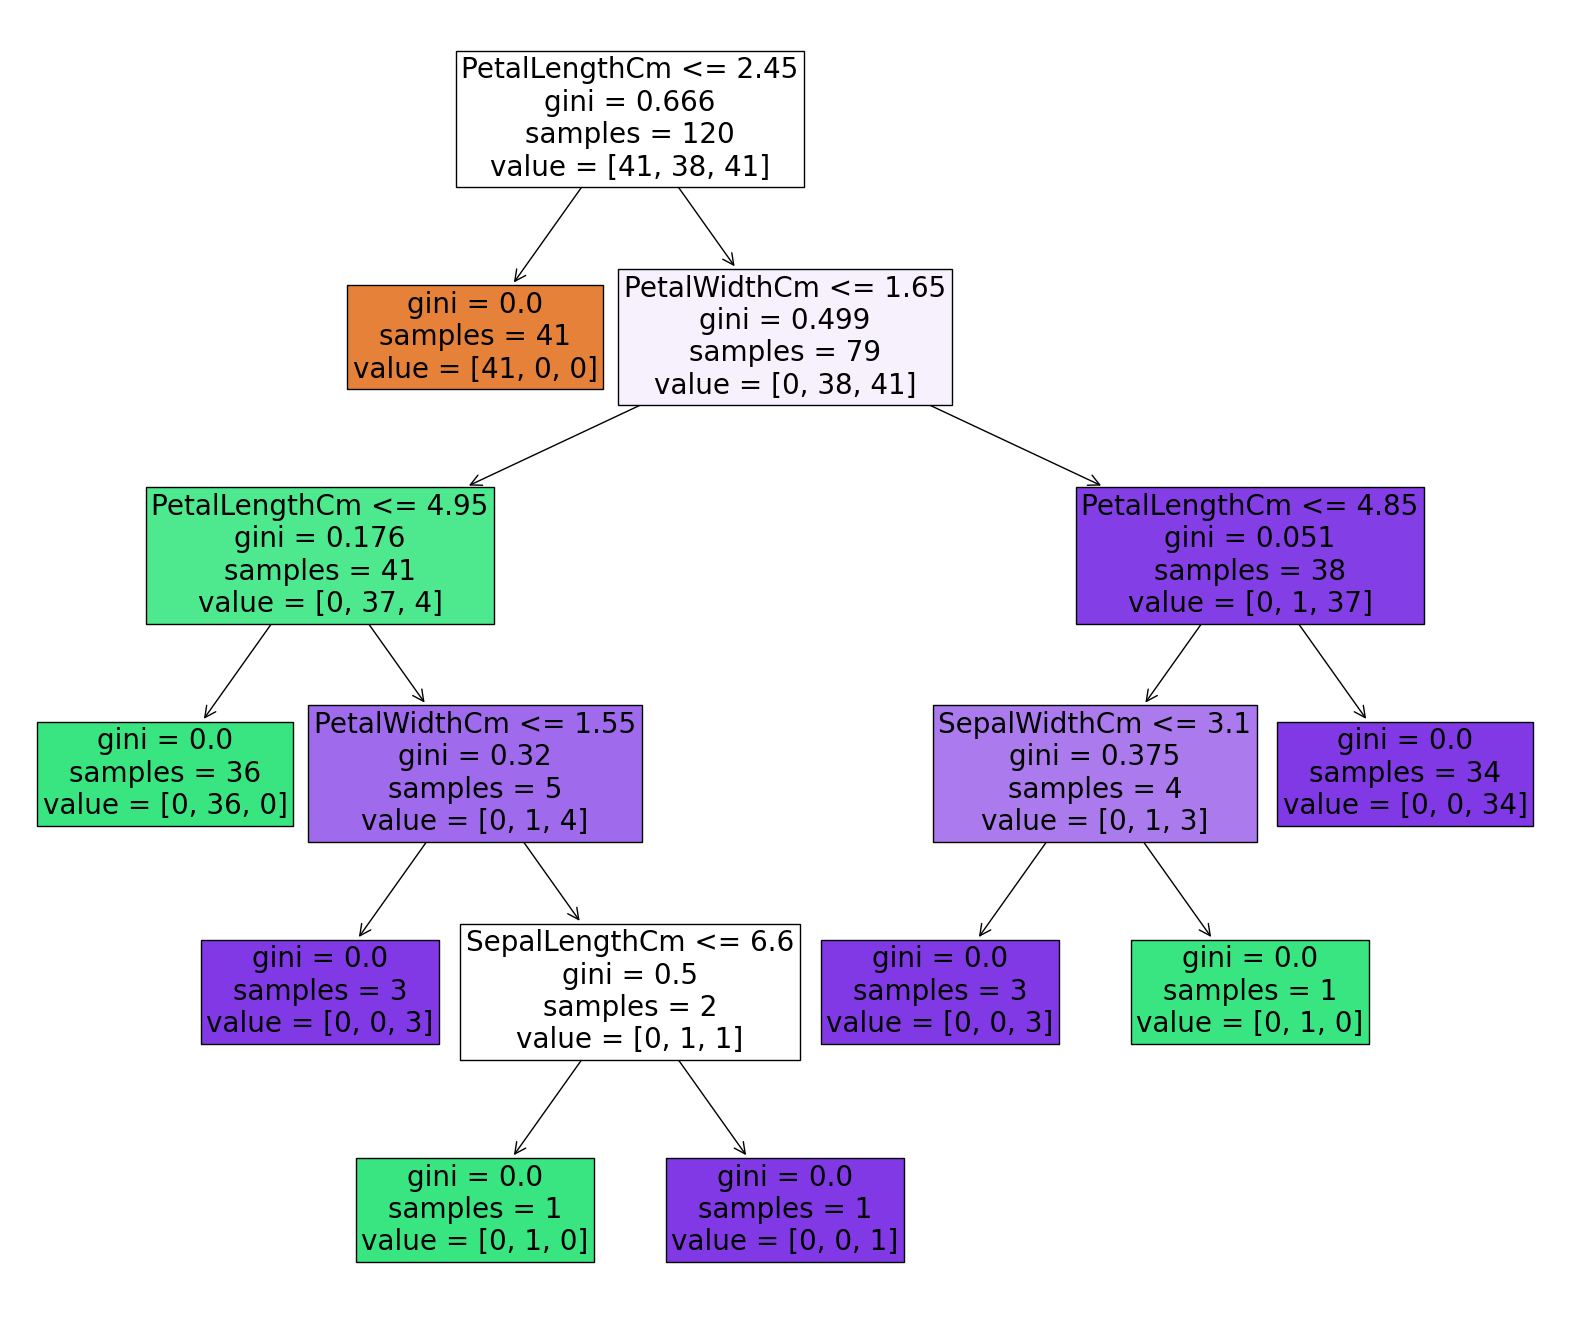

In [148]:
plt.figure(figsize=(20,17))
dtviz= tree.plot_tree(dt,feature_names = x.columns,filled=True,fontsize=20)